# LENDING CLUB CASE STUDY

## Problem Statement

you work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## Business Objective

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## Data Understanding

The data given contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc

### For Data Understanding we will explore data & will take following steps initialy
-   Read CSV file and check it's attributes before proceeding further.
-   Understand Rows & columns available , quality of data ( null, dtypes etc.)
-   Remove unnecessary colomns & rows to bring down the Data to a granularity where we can do operations on data  


## <font color = blue> Observation </font>
-  <font color = blue> Dataset consist of 111 Colomns & 39717 rows. </font>
-  <font color = blue> 56 columns are empty while theer are no empty rows. </font>

In [166]:
import numpy as np
import pandas as pd
df=pd.read_csv("loan.csv")
df.head()


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [167]:
print(df.shape)
print(df.info())
print(df.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [168]:
# Checking data if it is having Null columns
df.isnull().all().sum()

54

In [169]:
# checking empty coloms 
df.isnull().all().sum()

54

In [170]:
# checking empty rows 
df.isnull().all(axis=1).sum()

0

#### Remove unnecessary colomns & rows to bring down the Data to a granularity where we can do operations on data

In [171]:
# Drop colomns having more than 90% empty values
nulcol=df.columns[df.isnull().mean()>=0.9]
df1=df.drop(nulcol,axis=1)
print(df1.shape)

(39717, 55)


In [172]:
#checking percentage of null data in the dataset
round(100*(df1.isnull().sum()/len(df1.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [173]:
# Drop columns with customer behavior they cannot be used as predictor for loan approval
Behav_Var = ["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"]
df1.drop(labels =Behav_Var,axis =1, inplace=True)

In [174]:
df1.shape

(39717, 34)

In [175]:
#checking  again percentage of null data in the dataset
round(100*(df1.isnull().sum()/len(df1.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
mths_since_last_delinq        64.66
initial_list_status            0.00
collections_12_mths_ex_med  

In [176]:
# Dropping Colomns havig high Missing Values , mths_since_last_delinq,
#desc is having high missing values, also emp_title can be removed as it seems not relevant in analysis

df1 = df1.drop('mths_since_last_delinq', axis=1)
df1 = df1.drop('desc', axis=1)
df1 = df1.drop('emp_title', axis=1)

In [177]:
# Filling Null values with in emp_Length
df1.emp_length.fillna('0',inplace=True)

In [178]:
#checking  again percentage of null data in the dataset
round(100*(df1.isnull().sum()/len(df1.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    0.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
initial_list_status           0.00
collections_12_mths_ex_med    0.14
policy_code                   0.00
acc_now_delinq                0.00
chargeoff_within_12_mths      0.14
delinq_amnt         

###### Now the data has beeN cleaned to some extent , although few variables still have null values which at this moment we are chosing to keep as it is 


In [179]:
##Now checking Colomns D type & changing in to the category we require
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
initial_list_status            object
collections_12_mths_ex_med    float64
policy_code                     int64
acc_now_deli

In [180]:
# Interest Rate & empoyee length are object , these should be numeric  .let us check the data
print(df1.int_rate.value_counts())
print(df1.emp_length.value_counts())


# Observation -  interest rate Seems object  due to % symbol 
#emp length is due to character < & Years in it

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
21.48%      1
17.54%      1
18.72%      1
17.44%      1
16.20%      1
Name: int_rate, Length: 371, dtype: int64
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
0            1075
Name: emp_length, dtype: int64


In [181]:
# Lets remove % symbol from intrest rate & alpha charecters from Emp length column so that it can be used in calculations
df1.int_rate=df1.int_rate.apply(lambda x : float(x.replace("%","")))
df1.emp_length=df1.emp_length.str.extract('(\d+)')

##  Univariate Analysis
let us dive trough Data & analyse its spread & derive insights from them 

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [183]:
## Lets see distribution of loan amount fields using  decribe & distribution plot & Boxplot
round(df1[['loan_amnt','funded_amnt','funded_amnt_inv']].describe())

loan_amnt  funded_amnt  funded_amnt_inv
count    39717.0      39717.0          39717.0
mean     11219.0      10948.0          10397.0
std       7457.0       7187.0           7128.0
min        500.0        500.0              0.0
25%       5500.0       5400.0           5000.0
50%      10000.0       9600.0           8975.0
75%      15000.0      15000.0          14400.0
max      35000.0      35000.0          35000.0

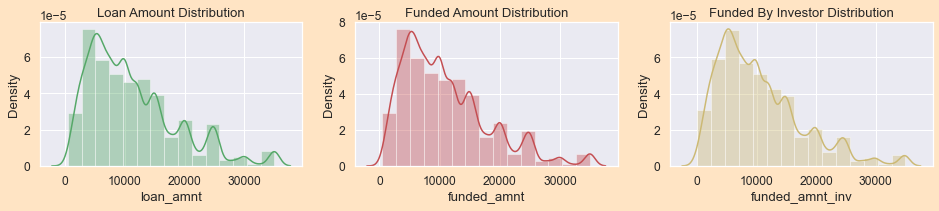

In [184]:
# Lets see distribution of loan amount fields using distribution plot.


plt.figure(figsize=(16,9),facecolor='bisque')
plt.subplot(3, 3, 1)
plt.title("Loan Amount Distribution")


sns.distplot(df1.loan_amnt,bins=15,color='g')
plt.subplot(3, 3, 2)
plt.title("Funded Amount Distribution")
sns.distplot(df1.funded_amnt,bins=15,color='r')
plt.subplot(3, 3, 3)
sns.distplot(df1.funded_amnt_inv,bins=15,color='y')
plt.title("Funded By Investor Distribution")

plt.show()
# Observation : no considerable difference between the loan amount & funded amount , follows the same trend

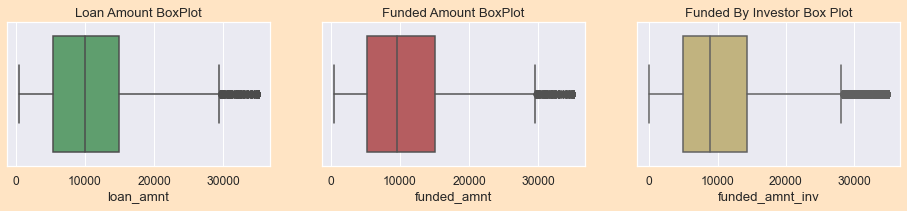

In [289]:


plt.figure(figsize=(16,9),facecolor='bisque')

plt.subplot(3, 3, 1)
plt.title("Loan Amount BoxPlot")
sns.boxplot(df1.loan_amnt,color='g')
plt.subplot(3, 3, 2)
plt.title("Funded Amount BoxPlot")
sns.boxplot(df1.funded_amnt,color='r')
plt.subplot(3, 3, 3)
sns.boxplot(df1.funded_amnt_inv,color='y')
plt.title("Funded By Investor Box Plot")
plt.show()

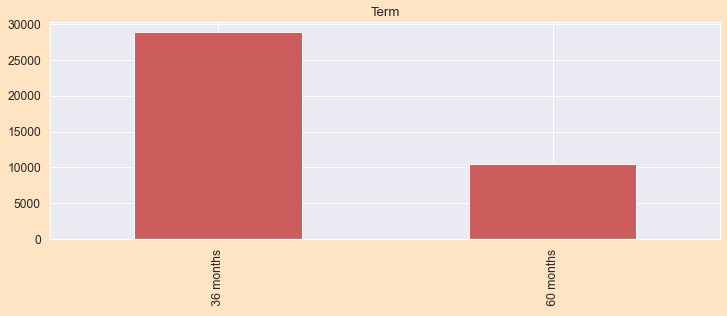

In [290]:
# Lets analyze Term colomn
plt.figure(figsize=(12,4),facecolor='bisque')
plt.title("Term")
df1['term'].value_counts().plot.bar(df1.term,color='indianred')
plt.show()

## Observation- Most of the loans were taken for 36 Months of period

In [187]:
# Univariate Analysis on Intrest Rate

df1.int_rate.describe()


count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

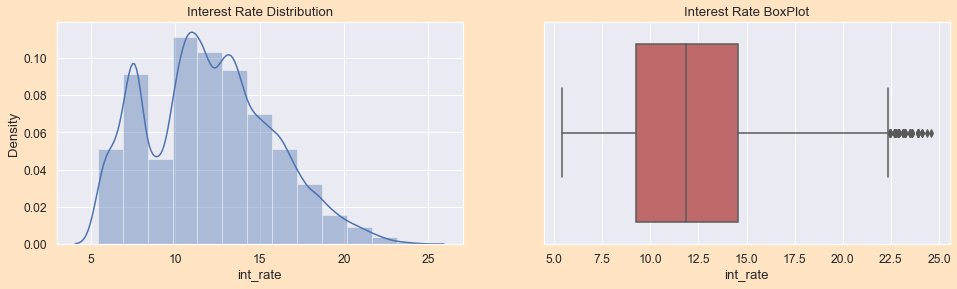

In [293]:
plt.figure(figsize=(16,9),facecolor='bisque')
plt.subplot(2, 2, 1)
sns.distplot(df1.int_rate,bins=13,color='b')
plt.title("Interest Rate Distribution")
plt.subplot(2, 2, 2)
sns.boxplot(df1.int_rate,color='indianred')
plt.title("Interest Rate BoxPlot")
plt.show()

## Observation-most of the Interest Rates on loans are in range of 10% - 15% 

In [189]:
# Univariate Analysis on Grades
# Drawing Pie plots on Grades

# Observation -Most of the  poppulation  lies in B(30.3 %) followed by A(25.4%)

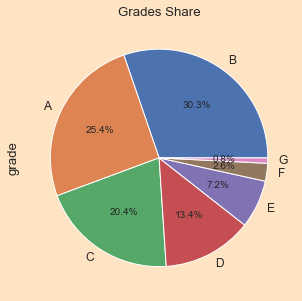

In [190]:
plt.figure(figsize=(5,5),facecolor='bisque')
plt.title("Grades Share")
df1['grade'].value_counts().plot.pie(autopct="%.1f%%")

plt.show()

In [191]:
df1.emp_length.value_counts

<bound method IndexOpsMixin.value_counts of 0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: object>

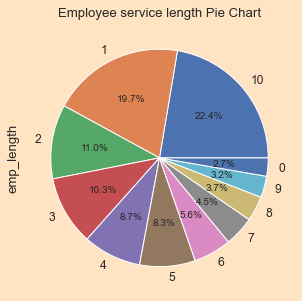

In [192]:
plt.figure(figsize=(10,5),facecolor='bisque')
plt.title("Employee service length Pie Chart")
df1['emp_length'].value_counts().plot.pie(autopct="%.1f%%")

plt.show()

In [193]:
#Univariate Analysis on Annual Income
# Checking Annual income with describe function to check various parameters
print(round(df1.annual_inc.describe(),2))
print(df1.annual_inc.median())

count      39717.00
mean       68968.93
std        63793.77
min         4000.00
25%        40404.00
50%        59000.00
75%        82300.00
max      6000000.00
Name: annual_inc, dtype: float64
59000.0


<AxesSubplot:xlabel='annual_inc'>

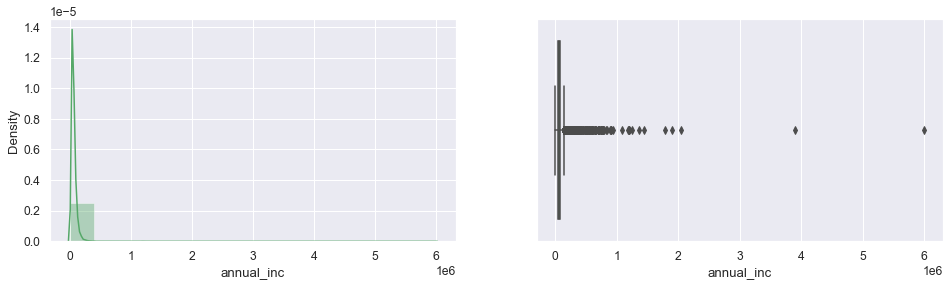

In [194]:
plt.figure(figsize=(16,9),facecolor='w')
plt.subplot(2, 2, 1)
sns.distplot(df1.annual_inc,bins=15,color='g')
plt.subplot(2, 2, 2)
sns.boxplot(df1.annual_inc,color='g')

# Observation - Max annual income is 6000000 while 75 % lies in 8230 , also throgh box plot it is evident that theer are out Liers

In [195]:
# Removing outliers from Annual Income , assuming 0.99%tile 

df1 = df1[df1["annual_inc"] < df1["annual_inc"].quantile(0.99)]

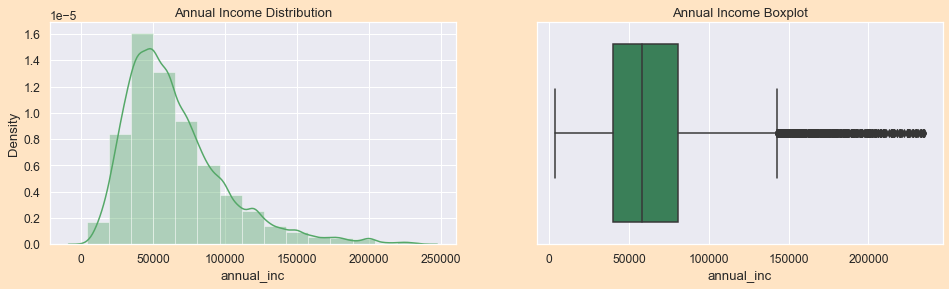

In [196]:
# Plotting again distribution & Box Plot
plt.figure(figsize=(16,9),facecolor='bisque')
plt.subplot(2, 2, 1)
plt.title("Annual Income Distribution")
sns.distplot(df1.annual_inc,bins=15,color='g')
plt.subplot(2, 2, 2)
sns.boxplot(df1.annual_inc,color='seagreen')
plt.title("Annual Income Boxplot")
plt.show()

# Observation - salary of  most of the borrowers lies between 40000~80000


In [197]:
#Univariate Analysis on loan status
#Exploring Loan status & checking the characterization & ratio of the attributes
round(df1.loan_status.value_counts()*100/len(df1),2)

#Observation - There are three categories in Loan status , fully paid , charged off & current . 
#Charged off is the category we must be most concerned of, this is  the default  done by borrower.


Fully Paid     82.93
Charged Off    14.20
Current         2.86
Name: loan_status, dtype: float64

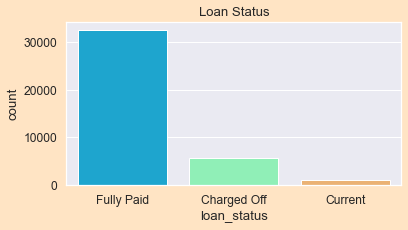

In [198]:
#Univariate Analysis on loan status
plt.figure(figsize=(6,3),facecolor='bisque')
sns.countplot(x="loan_status",data=df1,palette='rainbow')
plt.title("Loan Status")
plt.show()


#### By looking the above analysis Loan status is one of the most Important Value as it directy impacts our Predictions 
-  <font color = blue> hence let us analyse Variables in terms of Loan status & check if we could draw some conclusion</font>

Text(0.5, 1.0, 'Purpose of Loan Vs Loan Status')

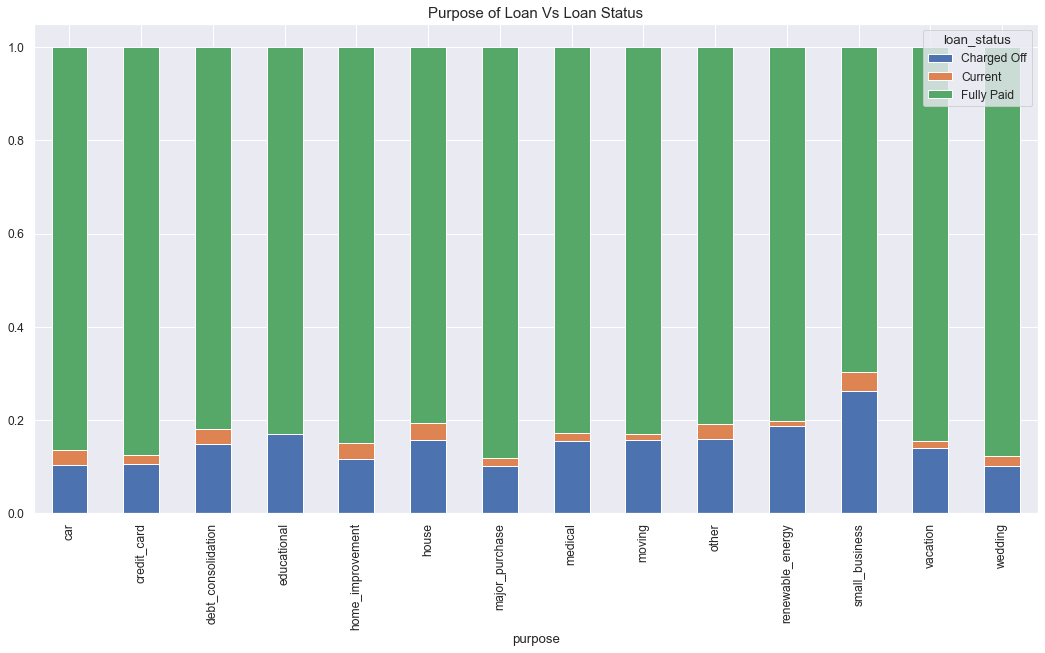

In [298]:
# let us analyse Purpose of Loan wrt Loan status

df1.groupby('purpose')['loan_status'].value_counts(1).unstack().plot(kind='bar',stacked=True,figsize=[18,9])
plt.show
plt.title(label="Purpose of Loan Vs Loan Status",
          fontsize=15)
# Observation - Debt Consolidation is the most sought out reason for Borrowing, also having max nos of Fully Paid Loan

In [294]:
# we shall also check if the purpose of loan also indicates any insight 
df1.groupby('purpose')['loan_status'].value_counts(1).unstack().plot(kind='bar',stacked=True,figsize=[20,8])


plt.title("Purpose of Loan Vs Loan Status",fontsize=15,color = 'black)
plt.show

# Interestingly we can see, although Fully paid Nos were more in Debt Consolidation
#but on average we can seethat it is having the Highest no of default
# Also the data Indicates that  borrowers are more likely to pay back when they borrow for short term Puprose loan ( weeding, Car,Vacation)

SyntaxError: EOL while scanning string literal (<ipython-input-294-11740c8f69e6>, line 5)

Text(0.5, 1.0, 'Grades Vs Loan Status')

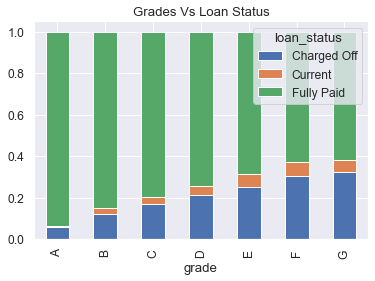

In [201]:
# let us analyse Grades wrt Loan status
df1.groupby('grade')['loan_status'].value_counts(1).unstack().plot(kind='bar',stacked=True)

plt.title("Grades Vs Loan Status")

#Observation- The chances of defaulting a loan increases as the grade moves from A ~> G

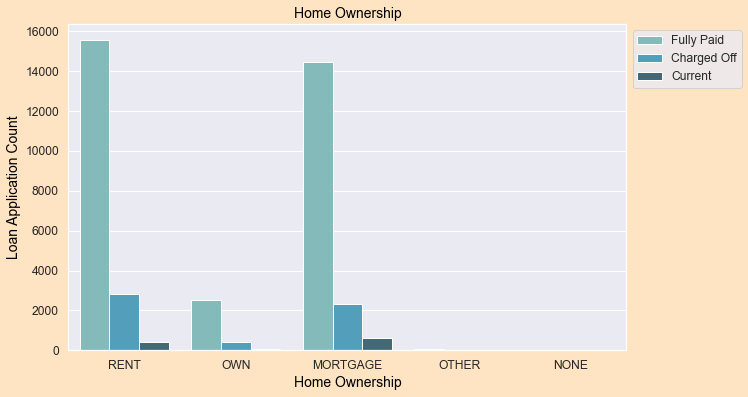

In [202]:
# Univariate Analysis -Home Ownership
plt.figure(figsize=(10,6),facecolor='bisque')
ax = sns.countplot(x="home_ownership",data=df1,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='black')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'black')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'black')      
plt.show()
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

#### Before Proceeding to Bivariate Analysis let us create derived colomn  to to do bivariate analysis

In [203]:
# categorise loan amounts into buckets
df1['loan_amt_categ']=pd.cut(df1['loan_amnt'],[0,5000,10000,15000,20000,25000,30000,35000],labels=['0-5000','5000-10000','10000-15000','15000-2000','20000-25000','25000-30000','30000+'])
# categorise interest rates into buckets
df1['int_rate_categ']=pd.cut(df1['int_rate'],[0,8,11,14,17,20,23,26],labels=['0-8','8-11','11-14','14-17','17-20','20-23','23+'])

# categorise annual income into buckets
df1['annual_inc_categ']=pd.cut(df1['annual_inc'],[0,40000,80000,120000,160000,200000,250000],labels=['0-40k','40k-80k','80k-120k',"120k-160k",'160k-200k','200k+'])
# categorise dti into buckets
df1['dti_categ']=pd.cut(df1['dti'],[0,10,15,20,25,30],labels=['0-10','10-15k','15k-20k','20k-25k','25+'])

In [204]:
# checking the data set to confirm if the new colmns are added
df1.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade  ... policy_code acc_now_delinq  \
0     10.65       162.87     B        B2  ...           1              0   
1     15.27        59.83     C        C4  ...           1              0   
2     15.96        84.33     C        C5  ...           1              0   
3     13.49       339.31     C        C1  ...           1              0   
4     12.69        67.79     B        B5  ...           1              0   

   chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  \
0                       0.0           0                  0.0       0.0   
1                       0.0           0                  0.0       0.0   
2                       0.0           0                  0.0       0.0   
3                       0.0           0                  0.0       0.0   
4                       0.0           0                  0.0       0.0   

  loan_amt_categ int_rate_categ annual_inc_categ dti_categ  
0         0-5000           8-11            0-40k       25+  
1         0-5000          14-17            0-40k      0-10  
2         0-5000          14-17            0-40k      0-10  
3     5000-10000          11-14          40k-80k   15k-20k  
4         0-5000          11-14          40k-80k   15k-20k  

[5 rows x 35 columns]

In [205]:
df1.shape

(39319, 35)

#### Default Ratio- Default ratio is the ratio of nos. of Loan defaulated  per total Nos of Loan disbursed in the category 
#### Default ratio will be Important derived Variable to arrive on conclusion & draw some Insights

In [206]:
# Let us Create Few subsetsby grouping loans with default ratio & do some Bivariate analysis.
# Creating Subset dataframe with default ratio for  Loan amount category Vs Loan Status
loan_categ_vs_loan = df1.groupby(['loan_amt_categ', 'loan_status']).loan_status.count().unstack().reset_index()
loan_categ_vs_loan['total']=loan_categ_vs_loan['Charged Off']+loan_categ_vs_loan['Current']+loan_categ_vs_loan['Fully Paid']
loan_categ_vs_loan["Default Ratio"]=round(loan_categ_vs_loan['Charged Off']/loan_categ_vs_loan['total'],2)

# Creating Subset dataframe with default ratio for  annual Income Category Vs Loan Status
annual_inc_vs_loan_status=df1.groupby(['annual_inc_categ','loan_status']).loan_status.count().unstack().reset_index()
annual_inc_vs_loan_status['total']=annual_inc_vs_loan_status['Charged Off']+annual_inc_vs_loan_status['Current']+annual_inc_vs_loan_status['Fully Paid']
annual_inc_vs_loan_status["Default Ratio"]=round(annual_inc_vs_loan_status['Charged Off']/annual_inc_vs_loan_status['total'],2)


# Creating Subset dataframe with default ratio for  purpose of loan Vs Loan Status
purpose_vs_loan_status=df1.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan_status['total']=purpose_vs_loan_status['Charged Off']+purpose_vs_loan_status['Current']+purpose_vs_loan_status['Fully Paid']
purpose_vs_loan_status["Default Ratio"]=round(purpose_vs_loan_status['Charged Off']/purpose_vs_loan_status['total'],2)


# Creating Subset dataframe with default ratio for  grade Vs Loan Status
grade_vs_loan_status=df1.groupby(['grade','loan_status']).loan_status.count().unstack().reset_index()
grade_vs_loan_status['total']=grade_vs_loan_status['Charged Off']+grade_vs_loan_status['Current']+grade_vs_loan_status['Fully Paid']
grade_vs_loan_status["Default Ratio"]=round(grade_vs_loan_status['Charged Off']/grade_vs_loan_status['total'],2)


# Creating Subset dataframe with default ratio for  employee length Vs Loan Status
emp_len_vs_loan=df1.groupby(['emp_length','loan_status']).loan_status.count().unstack().reset_index()
emp_len_vs_loan['total']=emp_len_vs_loan['Charged Off']+emp_len_vs_loan['Current']+emp_len_vs_loan['Fully Paid']
emp_len_vs_loan["Default Ratio"]=round(emp_len_vs_loan['Charged Off']/emp_len_vs_loan['total'],2)


# Creating Subset dataframe with default ratio for  home ownership Vs Loan Status
home_own_vs_loan_status=df1.groupby(['home_ownership','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_own_vs_loan_status['total']=home_own_vs_loan_status['Charged Off']+home_own_vs_loan_status['Current']+home_own_vs_loan_status['Fully Paid']
home_own_vs_loan_status["Default Ratio"]=round(home_own_vs_loan_status['Charged Off']/home_own_vs_loan_status['total'],2)


# Creating Subset dataframe with default ratio for verification status Vs Loan Status
vrf_status_vs_loan_status=df1.groupby(['verification_status','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
vrf_status_vs_loan_status['total']=vrf_status_vs_loan_status['Charged Off']+vrf_status_vs_loan_status['Current']+vrf_status_vs_loan_status['Fully Paid']
vrf_status_vs_loan_status["Default Ratio"]=round(vrf_status_vs_loan_status['Charged Off']/vrf_status_vs_loan_status['total'],2)


# Creating Subset dataframe with default ratio for bankruptcy Vs Loan Status
bankrupt_vs_loan_status=df1.groupby(['pub_rec_bankruptcies','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankrupt_vs_loan_status['total']=bankrupt_vs_loan_status['Charged Off']+bankrupt_vs_loan_status['Current']+bankrupt_vs_loan_status['Fully Paid']
bankrupt_vs_loan_status["Default Ratio"]=round(bankrupt_vs_loan_status['Charged Off']/bankrupt_vs_loan_status['total'],2)


# Creating Subset dataframe with default ratio for dti category Vs Loan Status
dti_vs_loan_status=df1.groupby(['dti_categ','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan_status['total']=dti_vs_loan_status['Charged Off']+dti_vs_loan_status['Current']+dti_vs_loan_status['Fully Paid']
dti_vs_loan_status["Default Ratio"]=round(dti_vs_loan_status['Charged Off']/dti_vs_loan_status['total'],2)

In [207]:
#Bivariate Analysis on Loan amount category
loan_categ_vs_loan.sort_values('Default Ratio',ascending=False)

loan_status loan_amt_categ  Charged Off  Current  Fully Paid  total  \
6                   30000+          173       88         499    760   
5              25000-30000          141       84         530    755   
4              20000-25000          530      161        2223   2914   
3               15000-2000          743      239        3550   4532   
0                   0-5000         1310       96        8126   9532   
1               5000-10000         1637      158       11101  12896   
2              10000-15000         1050      300        6580   7930   

loan_status  Default Ratio  
6                     0.23  
5                     0.19  
4                     0.18  
3                     0.16  
0                     0.14  
1                     0.13  
2                     0.13

In [208]:
df1['loan_amt_categ'] = df1['loan_amt_categ'].astype('category')


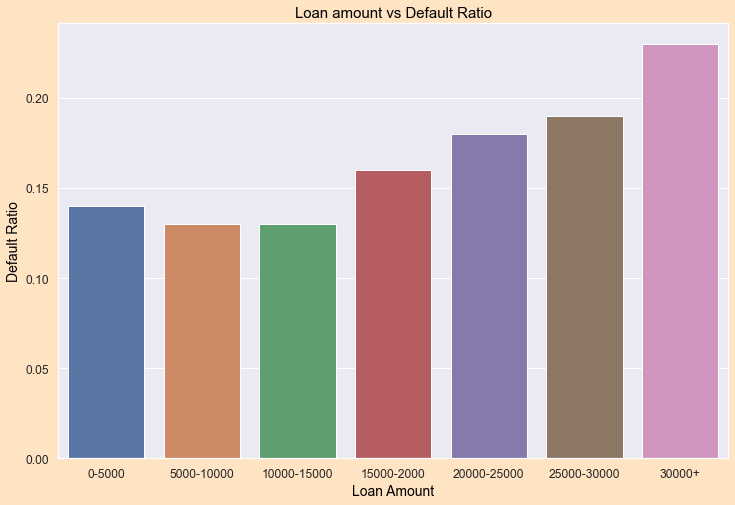

In [209]:
# Drawing Bar Plots
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='bisque')
ax1.set_title('Loan amount vs Default Ratio',fontsize=15,color = 'black')
ax1=sns.barplot(x='loan_amt_categ', y='Default Ratio', data=loan_categ_vs_loan)
ax1.set_ylabel('Default Ratio',fontsize=14,color = 'black')
ax1.set_xlabel('Loan Amount',fontsize=14,color='black')
plt.show()

In [210]:
##Bivariate Analysis on annual income  category
annual_inc_vs_loan_status.sort_values('Default Ratio',ascending=False)

loan_status annual_inc_categ  Charged Off  Current  Fully Paid  total  \
0                      0-40k         1751      179        7947   9877   
1                    40k-80k         2753      585       16131  19469   
2                   80k-120k          775      251        6067   7093   
3                  120k-160k          221       76        1707   2004   
4                  160k-200k           67       33         588    688   
5                      200k+           17        2         169    188   

loan_status  Default Ratio  
0                     0.18  
1                     0.14  
2                     0.11  
3                     0.11  
4                     0.10  
5                     0.09

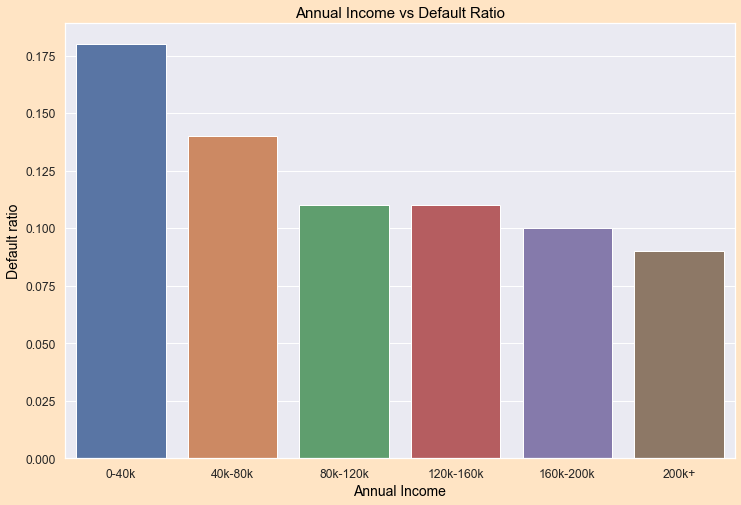

In [211]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='bisque')
ax1.set_title('Annual Income vs Default Ratio',fontsize=15,color = 'black')
ax1=sns.barplot(x='annual_inc_categ', y='Default Ratio', data=annual_inc_vs_loan_status)
ax1.set_ylabel('Default ratio',fontsize=14,color = 'black')
ax1.set_xlabel('Annual Income',fontsize=14,color='black')
plt.show()

In [212]:
##Bivariate Analysis on Purpose of Loan Vs Default ratio
purpose_vs_loan_status.sort_values('Default Ratio',ascending=False)

loan_status             purpose  Charged Off  Current  Fully Paid    total  \
11               small_business        472.0     74.0      1251.0   1797.0   
10             renewable_energy         19.0      1.0        81.0    101.0   
3                   educational         55.0      0.0       268.0    323.0   
5                         house         58.0     14.0       299.0    371.0   
8                        moving         91.0      7.0       479.0    577.0   
9                         other        629.0    126.0      3203.0   3958.0   
2            debt_consolidation       2752.0    580.0     15165.0  18497.0   
7                       medical        106.0     12.0       568.0    686.0   
12                     vacation         53.0      6.0       322.0    381.0   
4              home_improvement        338.0     97.0      2459.0   2894.0   
1                   credit_card        537.0    102.0      4450.0   5089.0   
0                           car        160.0     50.0      1332.0   1542.0   
6                major_purchase        220.0     37.0      1909.0   2166.0   
13                      wedding         94.0     20.0       823.0    937.0   

loan_status  Default Ratio  
11                    0.26  
10                    0.19  
3                     0.17  
5                     0.16  
8                     0.16  
9                     0.16  
2                     0.15  
7                     0.15  
12                    0.14  
4                     0.12  
1                     0.11  
0                     0.10  
6                     0.10  
13                    0.10

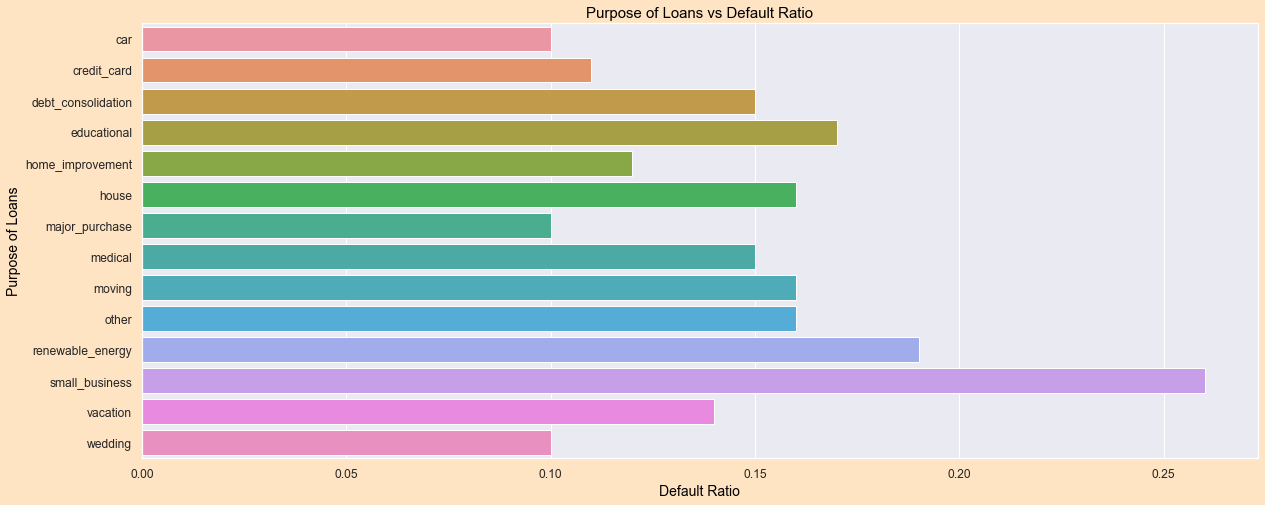

In [213]:
##Bivariate Analysis on Purpose of Loan Vs Default ratio
fig, ax1 = plt.subplots(figsize=(20, 8),facecolor='bisque')
ax1.set_title('Purpose of Loans vs Default Ratio',fontsize=15,color = 'black')
ax1=sns.barplot(x='Default Ratio', y='purpose', data=purpose_vs_loan_status)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='black')
ax1.set_xlabel('Default Ratio',fontsize=14,color = 'black')
plt.show()

In [214]:
##Bivariate Analysis on Grades Vs Default ratio
grade_vs_loan_status.sort_values('Default Ratio',ascending=False)

loan_status grade  Charged Off  Current  Fully Paid  total  Default Ratio
6               G           99       17         190    306           0.32
5               F          312       71         642   1025           0.30
4               E          704      176        1906   2786           0.25
3               D         1112      216        3916   5244           0.21
2               C         1342      262        6411   8015           0.17
1               B         1414      344       10167  11925           0.12
0               A          601       40        9377  10018           0.06

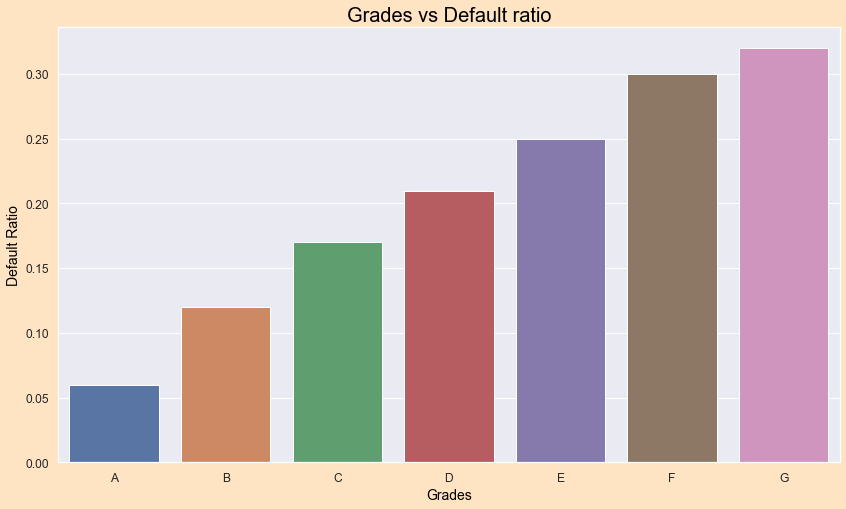

In [215]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='bisque')
ax1.set_title('Grades vs Default ratio',fontsize=20,color='black')
ax1=sns.barplot(x='grade', y='Default Ratio', data=grade_vs_loan_status)
ax1.set_xlabel('Grades',fontsize=14,color='black')
ax1.set_ylabel('Default Ratio',fontsize=14,color ='black')
plt.show()


In [216]:
##Bivariate Analysis on emp Length Vs Default ratio
emp_len_vs_loan.sort_values('Default Ratio',ascending=False).set_index('emp_length')

loan_status  Charged Off  Current  Fully Paid  total  Default Ratio
emp_length                                                         
0                    227       42         801   1070           0.21
10                  1316      386        7038   8740           0.15
7                    262       62        1435   1759           0.15
1                   1090      143        6533   7766           0.14
3                    551       82        3426   4059           0.14
5                    456       87        2712   3255           0.14
6                    305       58        1846   2209           0.14
8                    203       43        1216   1462           0.14
2                    561       97        3684   4342           0.13
4                    456       94        2860   3410           0.13
9                    157       32        1058   1247           0.13

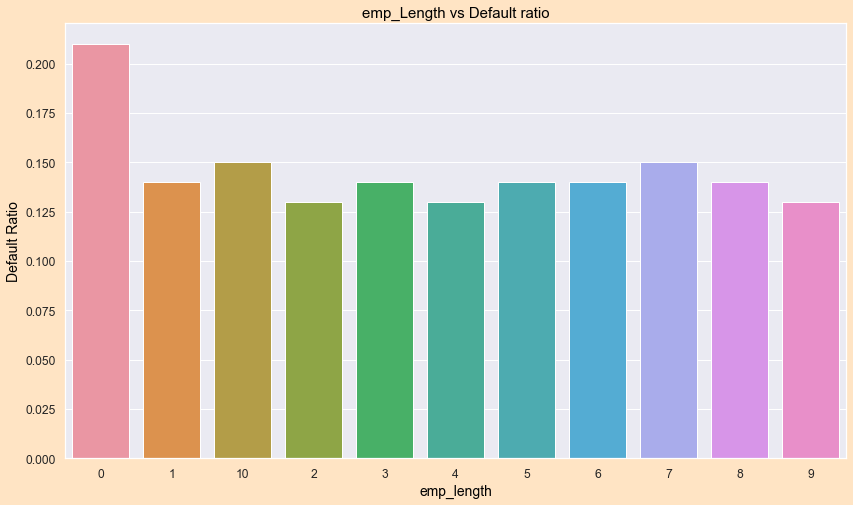

In [217]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='bisque')
ax1.set_title('emp_Length vs Default ratio',fontsize=15,color='black')
ax1=sns.barplot(x='emp_length', y='Default Ratio', data=emp_len_vs_loan)
ax1.set_xlabel('emp_length',fontsize=14,color='black')
ax1.set_ylabel('Default Ratio',fontsize=14,color ='black')
plt.show()

In [218]:
##Bivariate Analysis on Home Ownership Vs Default ratio
home_own_vs_loan_status.sort_values('Default Ratio',ascending=False)

loan_status home_ownership  Charged Off  Current  Fully Paid    total  \
2                    OTHER         18.0      0.0        78.0     96.0   
3                      OWN        440.0     82.0      2507.0   3029.0   
4                     RENT       2824.0    416.0     15573.0  18813.0   
0                 MORTGAGE       2302.0    628.0     14448.0  17378.0   
1                     NONE          0.0      0.0         3.0      3.0   

loan_status  Default Ratio  
2                     0.19  
3                     0.15  
4                     0.15  
0                     0.13  
1                     0.00

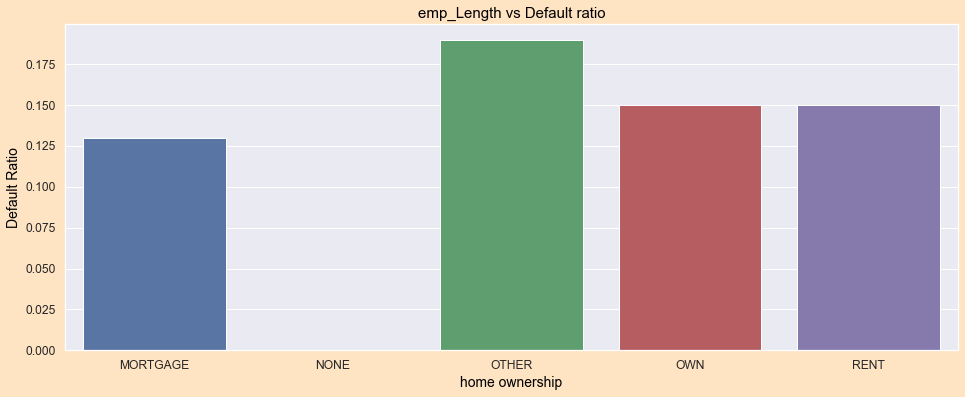

In [219]:
fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='bisque')
ax1.set_title('emp_Length vs Default ratio',fontsize=15,color='black')
ax1=sns.barplot(x='home_ownership', y='Default Ratio', data=home_own_vs_loan_status)
ax1.set_xlabel('home ownership',fontsize=14,color='black')
ax1.set_ylabel('Default Ratio',fontsize=14,color ='black')
plt.show()

In [220]:
##Bivariate Analysis on Verification status Vs Default ratio
df1.verification_status.value_counts()

Not Verified       16831
Verified           12625
Source Verified     9863
Name: verification_status, dtype: int64

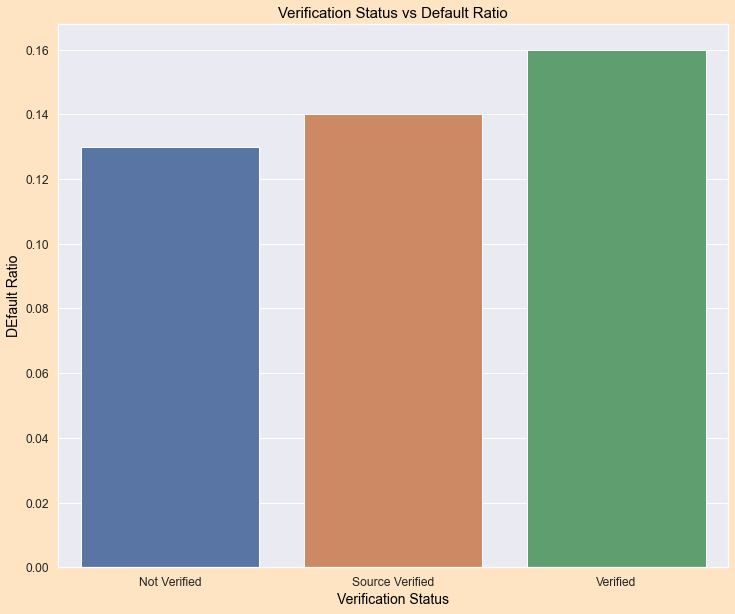

In [221]:
fig, ax1 = plt.subplots(figsize=(12,10),facecolor='bisque')
ax1.set_title('Verification Status vs Default Ratio',fontsize=15,color='black')
ax1=sns.barplot(x='verification_status', y='Default Ratio', data=vrf_status_vs_loan_status)
ax1.set_xlabel('Verification Status',fontsize=14,color='black')
ax1.set_ylabel('DEfault Ratio',fontsize=14,color = 'black')
plt.show()

In [222]:
##Bivariate Analysis on Bankruptcies  Vs Default ratio
bankrupt_vs_loan_status.sort_values('Default Ratio',ascending=False)


loan_status  pub_rec_bankruptcies  Charged Off  Current  Fully Paid  total  \
2                             2.0            2        2           3      7   
1                             1.0          365       37        1268   1670   
0                             0.0         5101     1087       30766  36954   

loan_status  Default Ratio  
2                     0.29  
1                     0.22  
0                     0.14

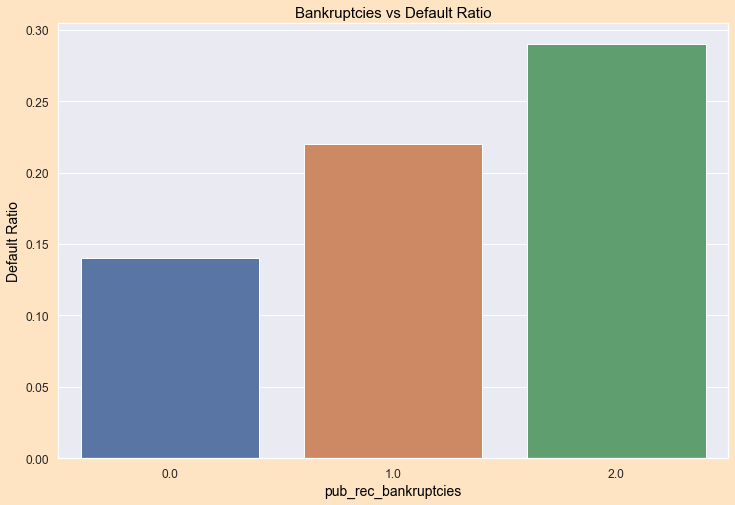

In [223]:
fig, ax1 = plt.subplots(figsize=(12,8),facecolor='bisque')
ax1.set_title('Bankruptcies vs Default Ratio',fontsize=15,color='black')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Default Ratio', data=bankrupt_vs_loan_status)
ax1.set_xlabel('pub_rec_bankruptcies',fontsize=14,color='black')
ax1.set_ylabel('Default Ratio',fontsize=14,color = 'black')
plt.show()


In [224]:
##Bivariate Analysis on DTI Vs Default ratio
dti_vs_loan_status.sort_values('Default Ratio',ascending=False)

loan_status dti_categ  Charged Off  Current  Fully Paid  total  Default Ratio
3             20k-25k         1116      237        5455   6808           0.16
2             15k-20k         1385      282        7400   9067           0.15
1              10-15k         1392      268        8165   9825           0.14
4                 25+           87       53         535    675           0.13
0                0-10         1576      281       10906  12763           0.12

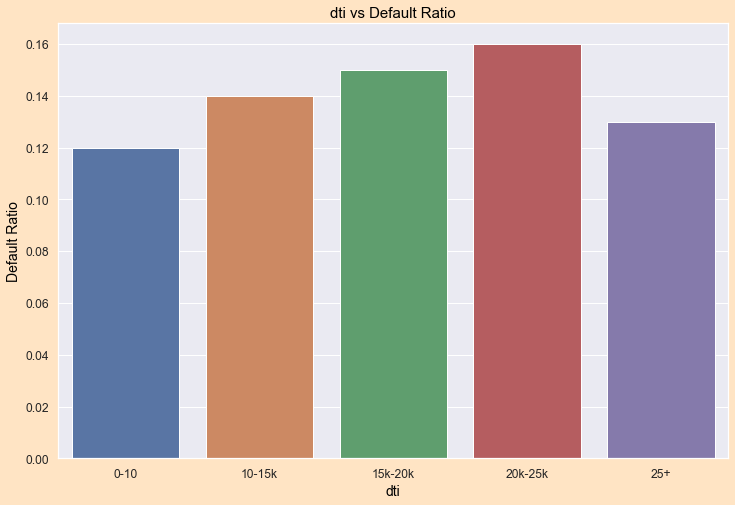

In [225]:
##Bivariate Analysis on DTI Vs Default ratio
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='bisque')
ax1.set_title('dti vs Default Ratio',fontsize=15,color='black')
ax1=sns.barplot(x='dti_categ', y='Default Ratio', data=dti_vs_loan_status)
ax1.set_xlabel('dti',fontsize=14,color='black')
ax1.set_ylabel('Default Ratio',fontsize=14,color = 'black')
plt.show()

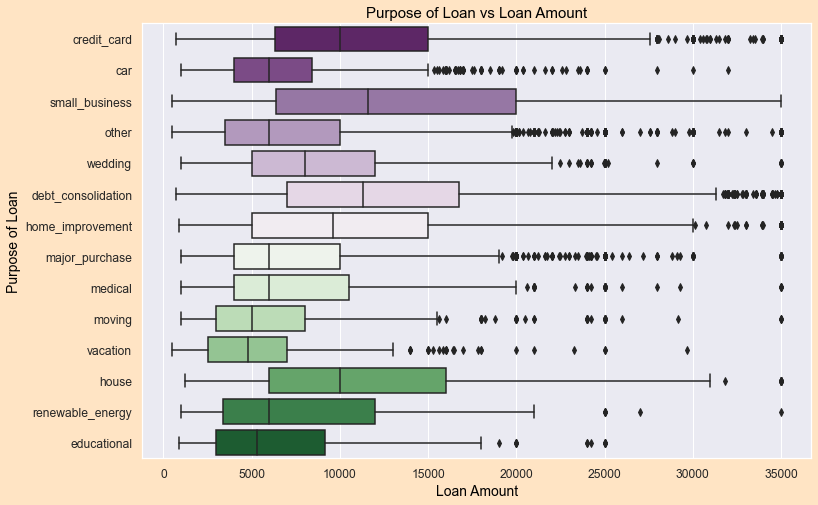

In [226]:

#Purpose of Loan vs Loan Amount
plt.figure(figsize=(12,8),facecolor='bisque')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =df1,palette='PRGn')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='black')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'black')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'black')
plt.show()

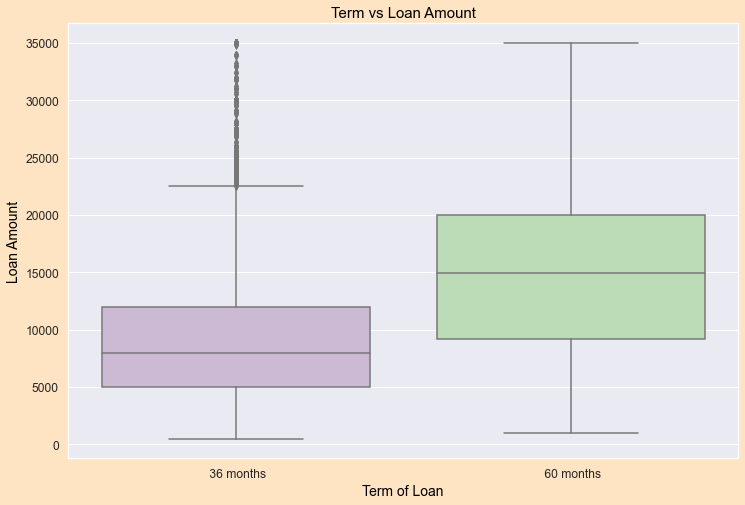

In [227]:
#term vs Loan Amount
plt.figure(figsize=(12,8),facecolor='bisque')
ax = sns.boxplot(y='loan_amnt', x='term', data =df1,palette='PRGn')
ax.set_title('Term vs Loan Amount',fontsize=15,color='black')
ax.set_xlabel('Term of Loan',fontsize=14,color = 'black')
ax.set_ylabel('Loan Amount',fontsize=14,color = 'black')
plt.show()

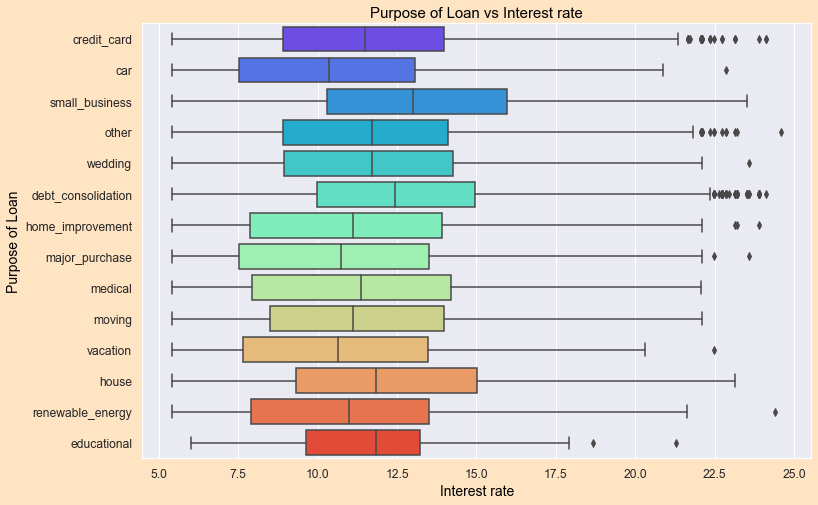

In [228]:
#Purpose vs Inerest rate
plt.figure(figsize=(12,8),facecolor='bisque')
ax = sns.boxplot(y='purpose', x='int_rate', data =df1,palette='rainbow')
ax.set_title('Purpose of Loan vs Interest rate',fontsize=15,color='black')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'black')
ax.set_xlabel('Interest rate',fontsize=14,color = 'black')
plt.show()

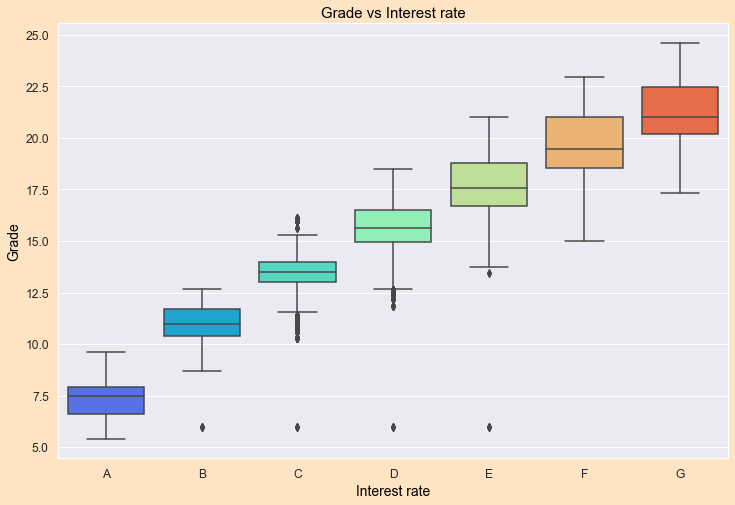

In [229]:
# Grads vs Inerest rate
plt.figure(figsize=(12,8),facecolor='bisque')
ax = sns.boxplot(x='grade', y='int_rate', data =df1,palette='rainbow',order = 'ABCDEFG')
ax.set_title('Grade vs Interest rate',fontsize=15,color='black')
ax.set_ylabel('Grade',fontsize=14,color = 'black')
ax.set_xlabel('Interest rate',fontsize=14,color = 'black')
plt.show()

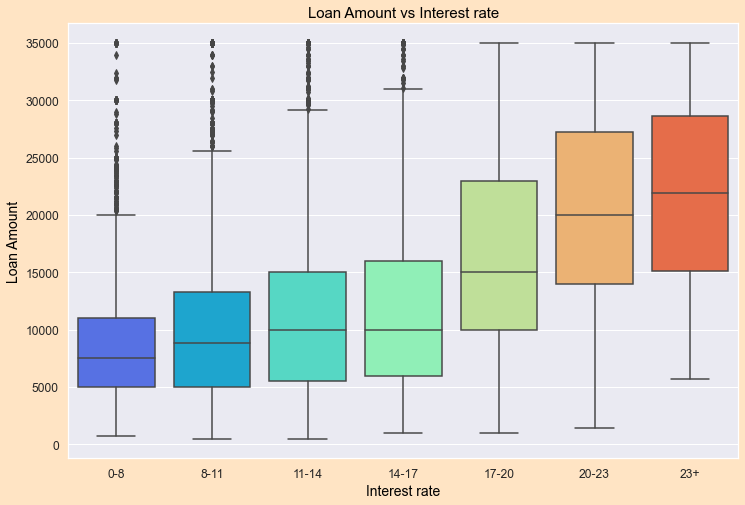

In [230]:
# Loan Amount vs Inerest rate
plt.figure(figsize=(12,8),facecolor='bisque')
ax = sns.boxplot(y='loan_amnt', x='int_rate_categ', data =df1,palette='rainbow')
ax.set_title('Loan Amount vs Interest rate',fontsize=15,color='black')
ax.set_ylabel('Loan Amount',fontsize=14,color = 'black')
ax.set_xlabel('Interest rate',fontsize=14,color = 'black')
plt.show()

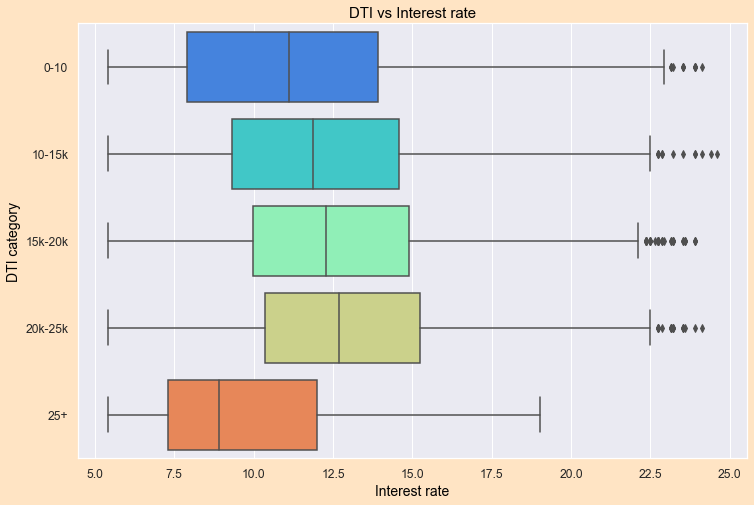

In [231]:
# dti Category vs Inerest rate
plt.figure(figsize=(12,8),facecolor='bisque')
ax = sns.boxplot(y='dti_categ', x='int_rate', data =df1,palette='rainbow')
ax.set_title('DTI vs Interest rate',fontsize=15,color='black')
ax.set_ylabel('DTI category',fontsize=14,color = 'black')
ax.set_xlabel('Interest rate',fontsize=14,color = 'black')
plt.show()

<Figure size 1224x864 with 0 Axes>

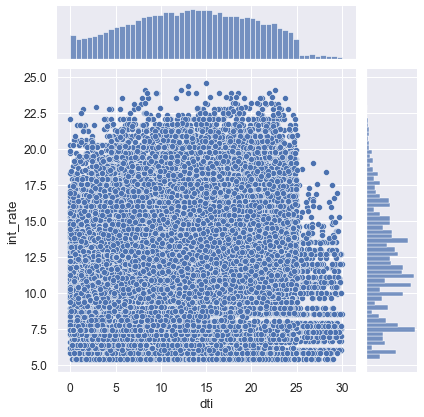

In [288]:
# dti  vs Inerest rate
plt.figure(figsize=(17,12),facecolor='bisque')
sns.jointplot(df1.dti,df1.int_rate)
plt.show()

In [233]:
 df1.corr()


id  member_id  loan_amnt  funded_amnt  \
id                          1.000000   0.993648   0.140368     0.150813   
member_id                   0.993648   1.000000   0.139294     0.148993   
loan_amnt                   0.140368   0.139294   1.000000     0.981566   
funded_amnt                 0.150813   0.148993   0.981566     1.000000   
funded_amnt_inv             0.248401   0.256936   0.939660     0.958071   
int_rate                    0.077824   0.073755   0.306502     0.310198   
installment                 0.084989   0.079512   0.929720     0.955709   
annual_inc                  0.035175   0.035465   0.415993     0.411176   
dti                         0.095583   0.096599   0.075917     0.075616   
collections_12_mths_ex_med       NaN        NaN        NaN          NaN   
policy_code                      NaN        NaN        NaN          NaN   
acc_now_delinq                   NaN        NaN        NaN          NaN   
chargeoff_within_12_mths         NaN        NaN        NaN          NaN   
delinq_amnt                      NaN        NaN        NaN          NaN   
pub_rec_bankruptcies       -0.009171  -0.008465  -0.035223    -0.036487   
tax_liens                        NaN        NaN        NaN          NaN   

                            funded_amnt_inv  int_rate  installment  \
id                                 0.248401  0.077824     0.084989   
member_id                          0.256936  0.073755     0.079512   
loan_amnt                          0.939660  0.306502     0.929720   
funded_amnt                        0.958071  0.310198     0.955709   
funded_amnt_inv                    1.000000  0.304266     0.904120   
int_rate                           0.304266  1.000000     0.280611   
installment                        0.904120  0.280611     1.000000   
annual_inc                         0.394002  0.073150     0.413737   
dti                                0.083602  0.113924     0.063923   
collections_12_mths_ex_med              NaN       NaN          NaN   
policy_code                             NaN       NaN          NaN   
acc_now_delinq                          NaN       NaN          NaN   
chargeoff_within_12_mths                NaN       NaN          NaN   
delinq_amnt                             NaN       NaN          NaN   
pub_rec_bankruptcies              -0.040907  0.083933    -0.031818   
tax_liens                               NaN       NaN          NaN   

                            annual_inc       dti  collections_12_mths_ex_med  \
id                            0.035175  0.095583                         NaN   
member_id                     0.035465  0.096599                         NaN   
loan_amnt                     0.415993  0.075917                         NaN   
funded_amnt                   0.411176  0.075616                         NaN   
funded_amnt_inv               0.394002  0.083602                         NaN   
int_rate                      0.073150  0.113924                         NaN   
installment                   0.413737  0.063923                         NaN   
annual_inc                    1.000000 -0.108919                         NaN   
dti                          -0.108919  1.000000                         NaN   
collections_12_mths_ex_med         NaN       NaN                         NaN   
policy_code                        NaN       NaN                         NaN   
acc_now_delinq                     NaN       NaN                         NaN   
chargeoff_within_12_mths           NaN       NaN                         NaN   
delinq_amnt                        NaN       NaN                         NaN   
pub_rec_bankruptcies         -0.017925  0.004710                         NaN   
tax_liens                          NaN       NaN                         NaN   

                            policy_code  acc_now_delinq  \
id                                  NaN             NaN   
member_id                           NaN             NaN   
loan_amnt                    

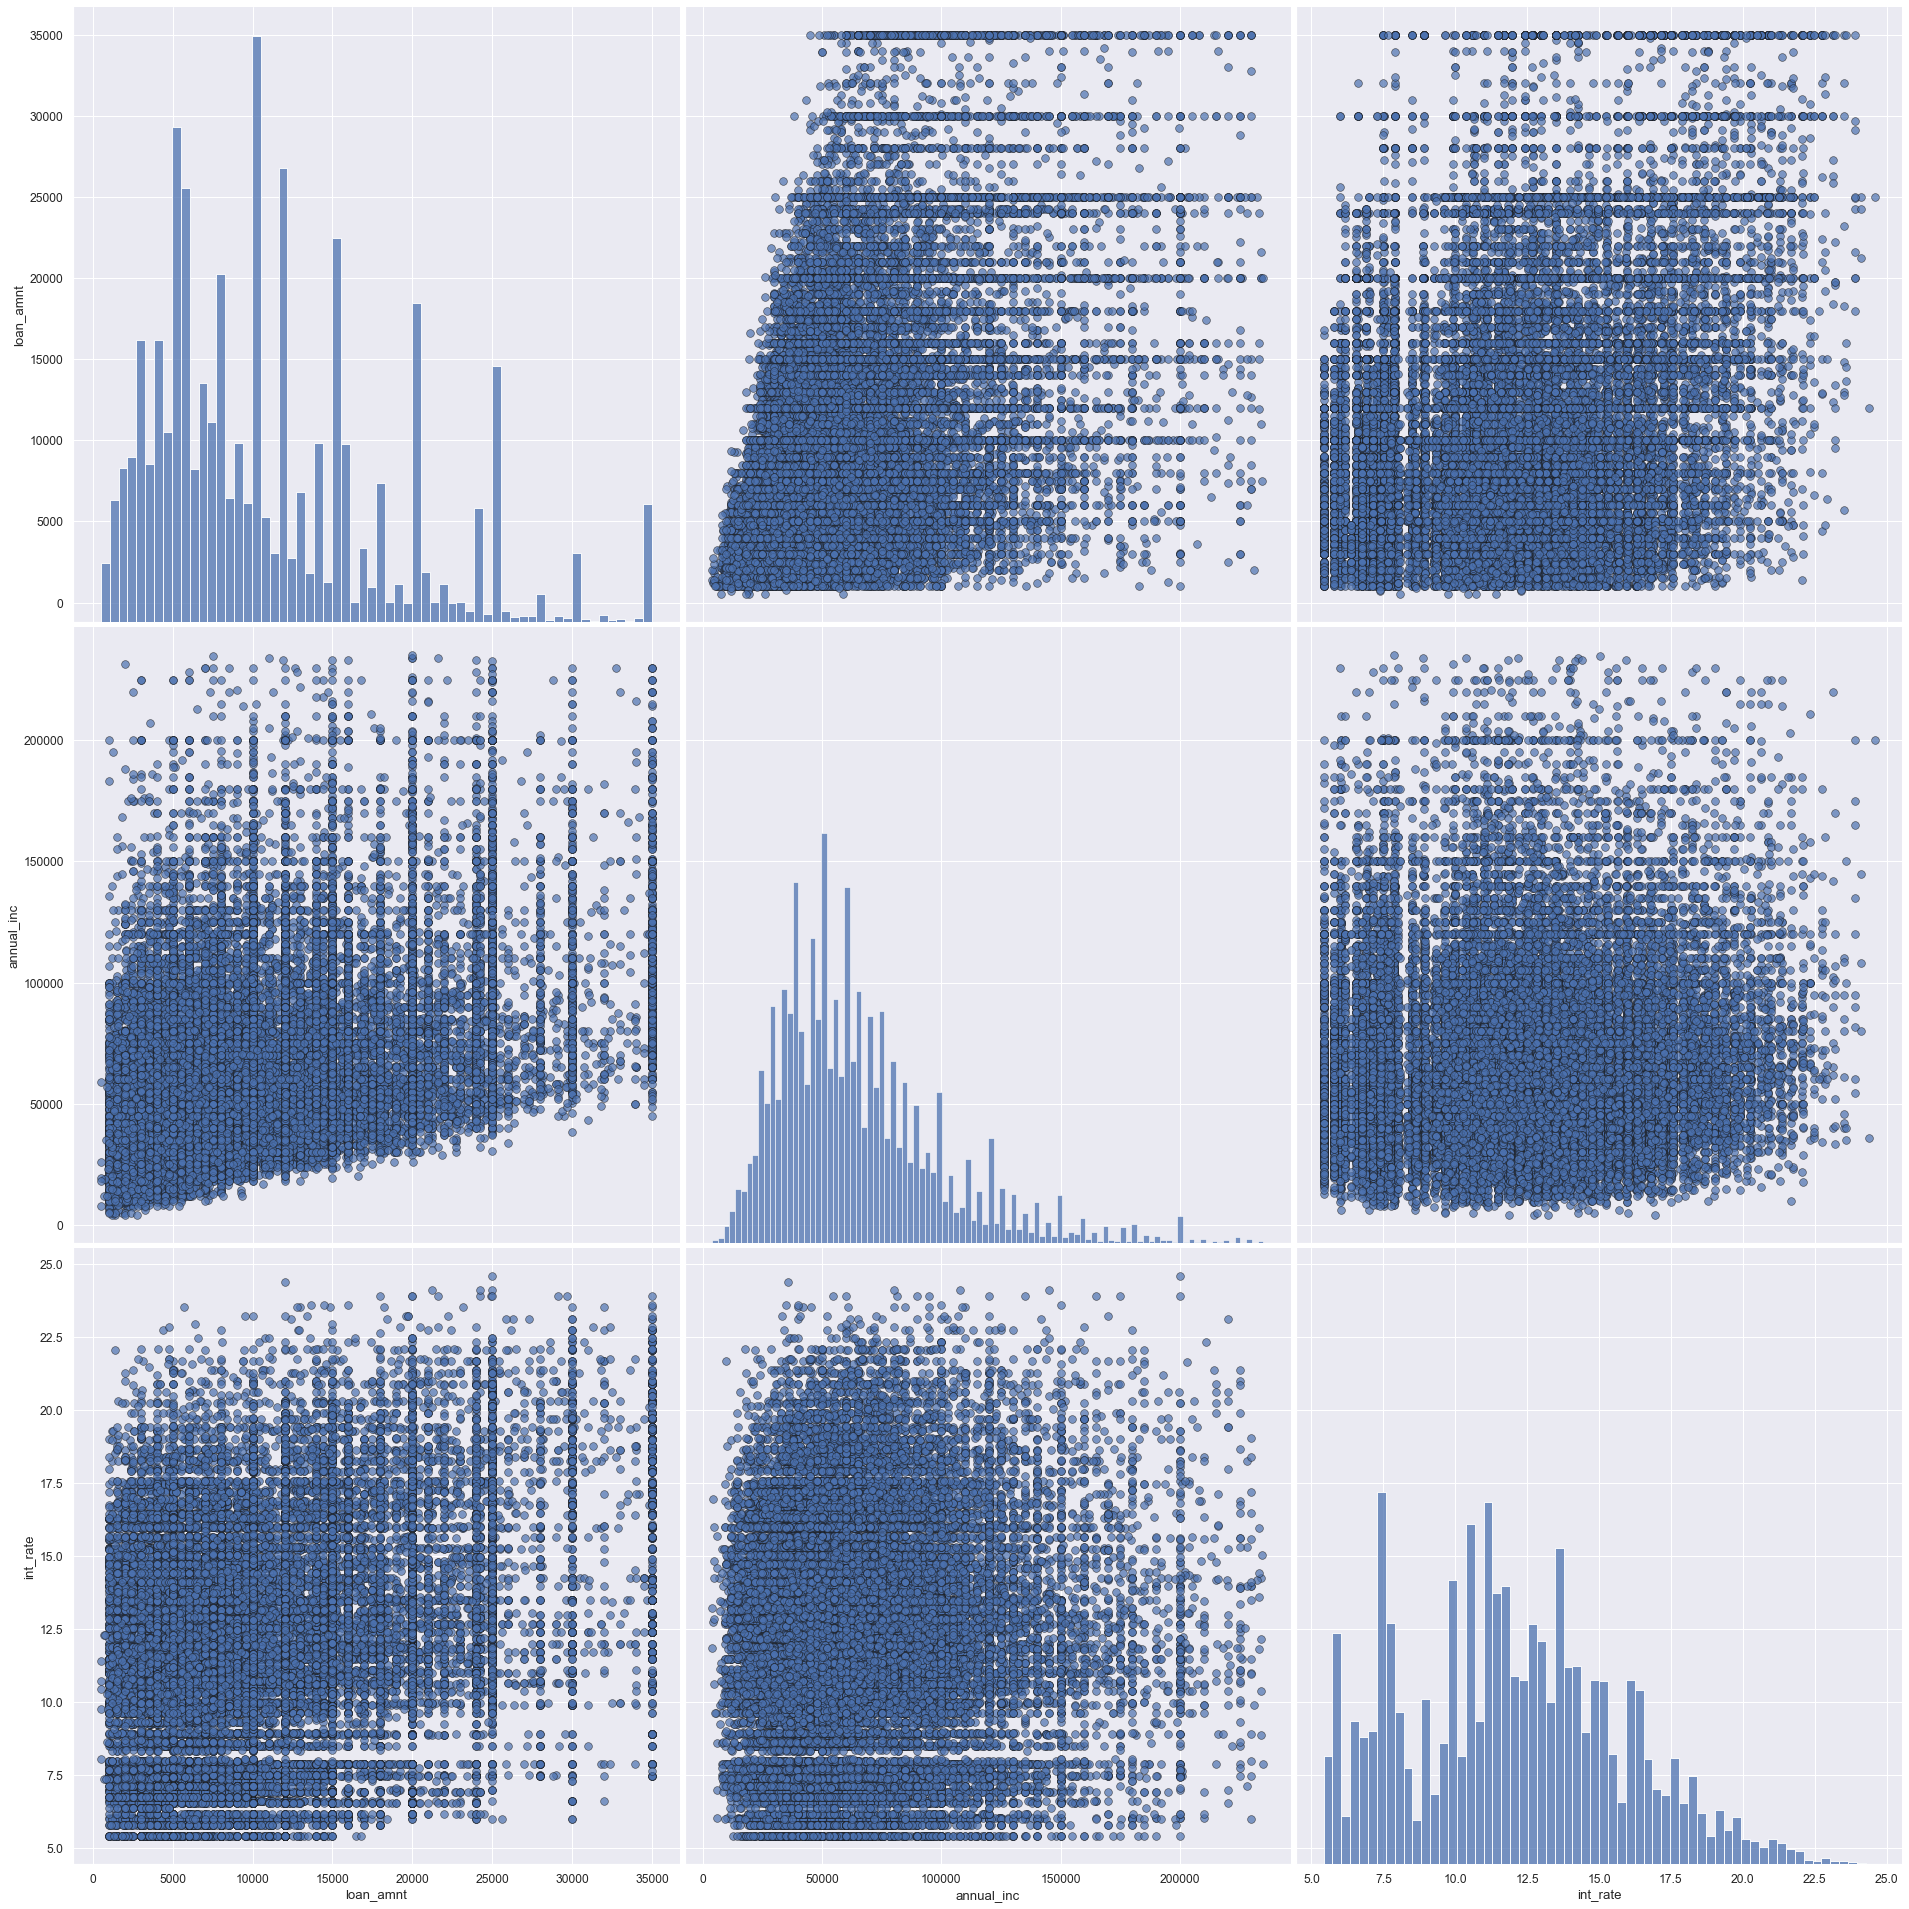

In [234]:
# Multivariate analysis on major Parameter to draw Pair plot 

sns.pairplot(df1[['loan_amnt', 'annual_inc', 'int_rate']],plot_kws = {'alpha': 0.7, 's': 60, 'edgecolor': 'k'},size=9)

plt.show()

In [285]:
nulcol_rem=["collections_12_mths_ex_med","policy_code","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens","id","member_id"]
df1sub=df1.drop(nulcol_rem,axis=1)


In [286]:
df1sub.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
4       3000         3000           3000.0   60 months     12.69        67.79   

  grade sub_grade emp_length home_ownership  ...                 title  \
0     B        B2         10           RENT  ...              Computer   
1     C        C4          1           RENT  ...                  bike   
2     C        C5         10           RENT  ...  real estate business   
3     C        C1         10           RENT  ...              personel   
4     B        B5          1           RENT  ...              Personal   

  zip_code addr_state    dti initial_list_status pub_rec_bankruptcies  \
0    860xx         AZ  27.65                   f                  0.0   
1    309xx         GA   1.00                   f                  0.0   
2    606xx         IL   8.72                   f                  0.0   
3    917xx         CA  20.00                   f                  0.0   
4    972xx         OR  17.94                   f                  0.0   

  loan_amt_categ int_rate_categ annual_inc_categ dti_categ  
0         0-5000           8-11            0-40k       25+  
1         0-5000          14-17            0-40k      0-10  
2         0-5000          14-17            0-40k      0-10  
3     5000-10000          11-14          40k-80k   15k-20k  
4         0-5000          11-14          40k-80k   15k-20k  

[5 rows x 27 columns]

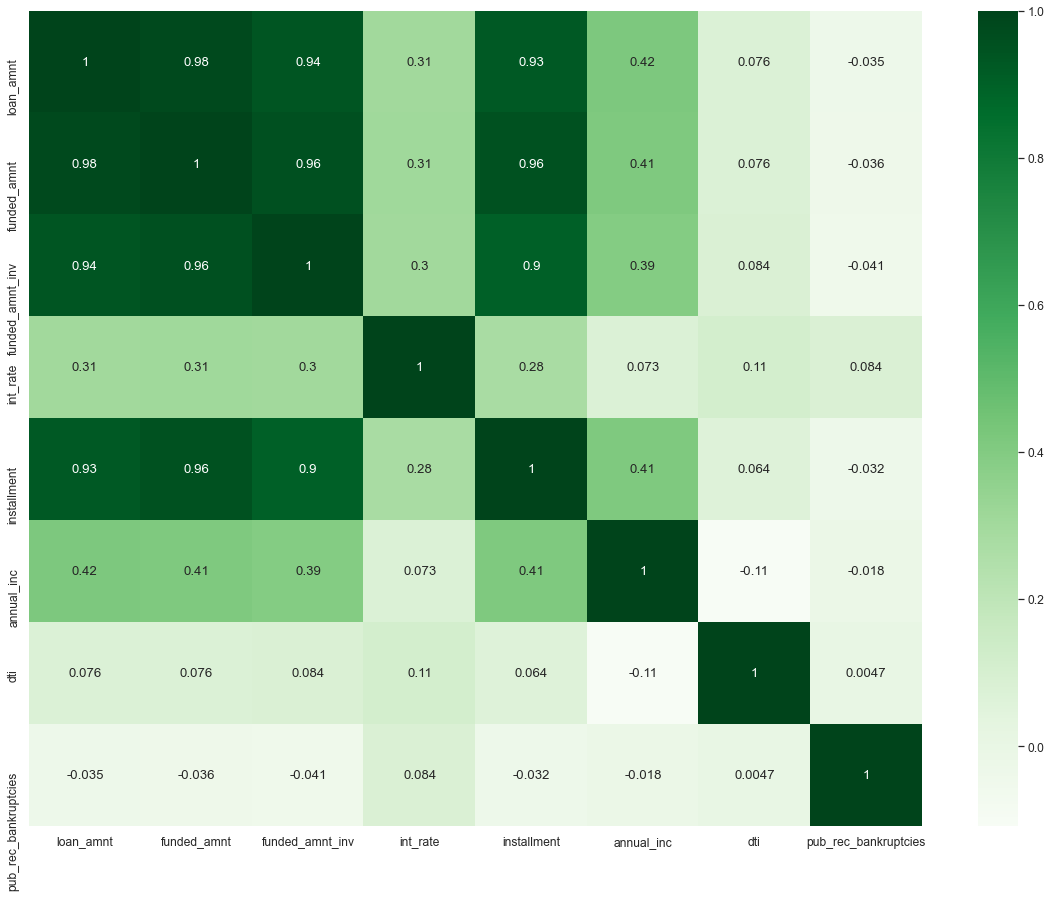

In [299]:
 # Heat Maps for Major Variable to check Correltion 

loan_correlation = df1sub.corr()
sns.set(font_scale=1.1)
plt.subplots(figsize=(20,15))
sns.heatmap(loan_correlation,annot=True,cmap="Greens")
plt.show()

## Conclusions

##### Opportunities



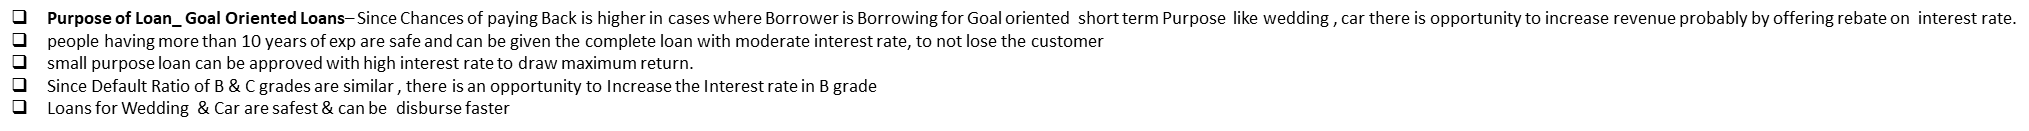. </font>


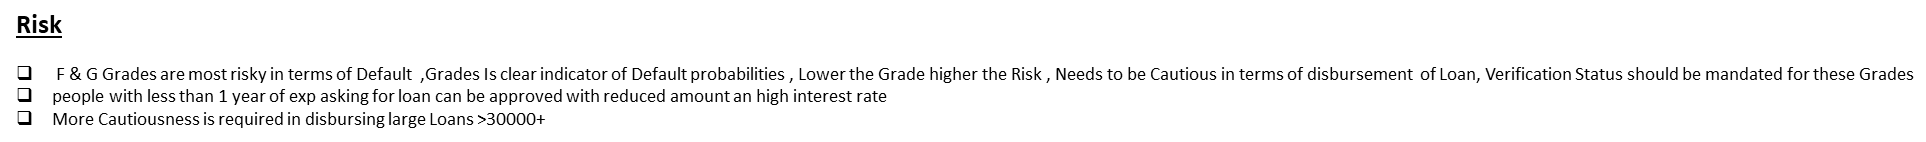
